# Honors Conference

## Charles Peeke, Dr. Bush, Dr. Shank

# Imports

In [2]:
from __future__ import division
import numpy as np
import scipy.signal as sg
from scipy.fftpack import rfft, fftfreq
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import matplotlib.colors as colors
from pydub import AudioSegment

import utilities as util

In [3]:
fs_bells, wav_bells = wavfile.read('../samples/HandBells.wav')
fs_guitar, wav_guitar = wavfile.read('../samples/Guitar.wav')
fs_piano, wav_piano = wavfile.read('../samples/Piano.wav')
fs_chords, wav_chords = wavfile.read('../samples/Chords.wav')

fs_piano_note,  wav_piano_note  = wavfile.read('../samples/Piano_C_Major_Note.wav')
fs_piano_scale, wav_piano_scale = wavfile.read('../samples/Piano_C_Major_Scale.wav')
fs_guitar_note,  wav_guitar_note  = wavfile.read('../samples/Guitar_C_Major_Note.wav')
fs_guitar_scale, wav_guitar_scale = wavfile.read('../samples/Guitar_C_Major_Scale.wav')
fs_trombone_note,  wav_trombone_note  = wavfile.read('../samples/Trombone_C_Major_Note.wav')
fs_trombone_scale, wav_trombone_scale = wavfile.read('../samples/Trombone_C_Major_Scale.wav')

In [4]:
wav_bells  = wav_bells.astype(np.double)
wav_guitar = wav_guitar.astype(np.double)
wav_piano  = wav_piano.astype(np.double)
wav_chords = wav_chords.astype(np.double)

wav_piano_note  = wav_piano_note.astype(np.double)
wav_piano_scale = wav_piano_scale.astype(np.double)
wav_guitar_note  = wav_guitar_note.astype(np.double)
wav_guitar_scale = wav_guitar_scale.astype(np.double)
wav_trombone_note  = wav_trombone_note.astype(np.double)
wav_trombone_scale = wav_trombone_scale.astype(np.double)

In [5]:
freq_bells, time_bells, spectrogram_bells = sg.spectrogram(wav_bells, fs_bells, nperseg=16384)
freq_guitar, time_guitar, spectrogram_guitar = sg.spectrogram(wav_guitar, fs_guitar, nperseg=16384)
freq_piano, time_piano, spectrogram_piano = sg.spectrogram(wav_piano, fs_piano, nperseg=16384)
freq_chords, time_chords, spectrogram_chords = sg.spectrogram(wav_chords, fs_chords, nperseg=16384)

freq_piano_note,  time_piano_note,  spectrogram_piano_note  = sg.spectrogram(wav_piano_note,  fs_piano_note,  nperseg=16384)
freq_piano_scale, time_piano_scale, spectrogram_piano_scale = sg.spectrogram(wav_piano_scale, fs_piano_scale, nperseg=16384)
freq_guitar_note,  time_guitar_note,  spectrogram_guitar_note  = sg.spectrogram(wav_guitar_note,  fs_guitar_note,  nperseg=16384)
freq_guitar_scale, time_guitar_scale, spectrogram_guitar_scale = sg.spectrogram(wav_guitar_scale, fs_guitar_scale, nperseg=16384)
freq_trombone_note,  time_trombone_note,  spectrogram_trombone_note  = sg.spectrogram(wav_trombone_note,  fs_trombone_note,  nperseg=16384)
freq_trombone_scale, time_trombone_scale, spectrogram_trombone_scale = sg.spectrogram(wav_trombone_scale, fs_trombone_scale, nperseg=16384)

In [6]:
freq_piano_scale, time_piano_scale, spectrogram_piano_scale = sg.spectrogram(wav_piano_scale, fs_piano_scale, nperseg=16384, noverlap=(16384-fs_piano_scale//24)//2)


In [7]:
argsort_bells  = np.argsort(spectrogram_bells,  axis=0)
argsort_guitar = np.argsort(spectrogram_guitar, axis=0)
argsort_piano  = np.argsort(spectrogram_piano,  axis=0)
argsort_chords = np.argsort(spectrogram_chords, axis=0)

argsort_piano_note  = np.argsort(spectrogram_piano_note,  axis=0)
argsort_piano_scale = np.argsort(spectrogram_piano_scale, axis=0)
argsort_guitar_note  = np.argsort(spectrogram_guitar_note,  axis=0)
argsort_guitar_scale = np.argsort(spectrogram_guitar_scale, axis=0)
argsort_trombone_note  = np.argsort(spectrogram_trombone_note,  axis=0)
argsort_trombone_scale = np.argsort(spectrogram_trombone_scale, axis=0)

In [8]:
corr_bells,  nf_bells  = util.make_corrections(spectrogram_bells,  freq_bells)
corr_guitar, nf_guitar = util.make_corrections(spectrogram_guitar, freq_guitar)
corr_piano,  nf_piano  = util.make_corrections(spectrogram_piano,  freq_piano)
corr_chords, nf_chords = util.make_corrections(spectrogram_chords, freq_chords)

corr_piano_note,  nf_piano_note  = util.make_corrections(spectrogram_piano_note,  freq_piano_note)
corr_piano_scale, nf_piano_scale = util.make_corrections(spectrogram_piano_scale, freq_piano_scale)
corr_guitar_note,  nf_guitar_note  = util.make_corrections(spectrogram_guitar_note,  freq_guitar_note)
corr_guitar_scale, nf_guitar_scale = util.make_corrections(spectrogram_guitar_scale, freq_guitar_scale)
corr_trombone_note,  nf_trombone_note  = util.make_corrections(spectrogram_trombone_note, freq_trombone_note)
corr_trombone_scale, nf_trombone_scale = util.make_corrections(spectrogram_trombone_scale, freq_trombone_scale)

In [9]:
argsort_bells2  = np.argsort(corr_bells,  axis=0)
argsort_guitar2 = np.argsort(corr_guitar, axis=0)
argsort_piano2  = np.argsort(corr_piano,  axis=0)
argsort_chords2 = np.argsort(corr_chords, axis=0)

argsort_piano_note2  = np.argsort(corr_piano_note,  axis=0)
argsort_piano_scale2 = np.argsort(corr_piano_scale, axis=0)
argsort_guitar_note2  = np.argsort(corr_guitar_note,  axis=0)
argsort_guitar_scale2 = np.argsort(corr_guitar_scale, axis=0)
argsort_trombone_note2  = np.argsort(corr_trombone_note,  axis=0)
argsort_trombone_scale2 = np.argsort(corr_trombone_scale, axis=0)

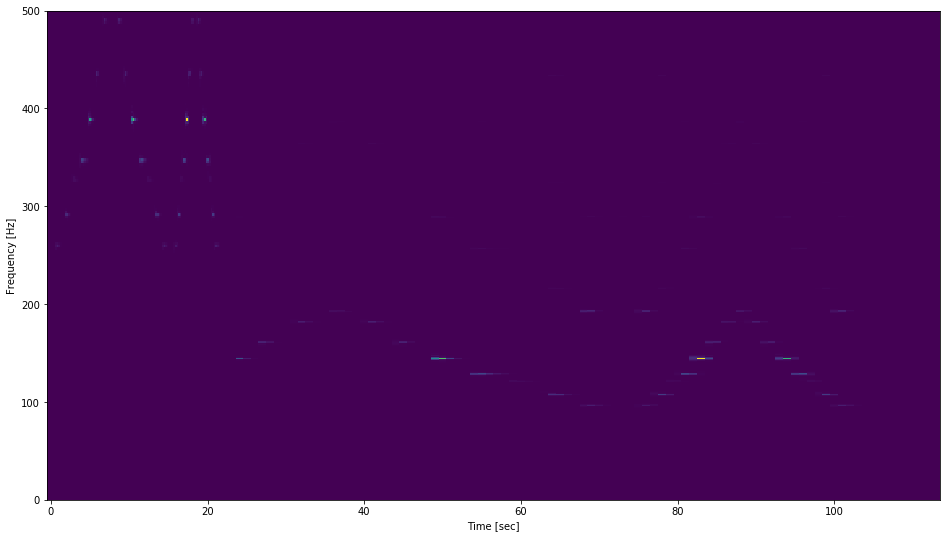

In [12]:
util.display_spec(time_piano_scale, freq_piano_scale, spectrogram_piano_scale, 500)

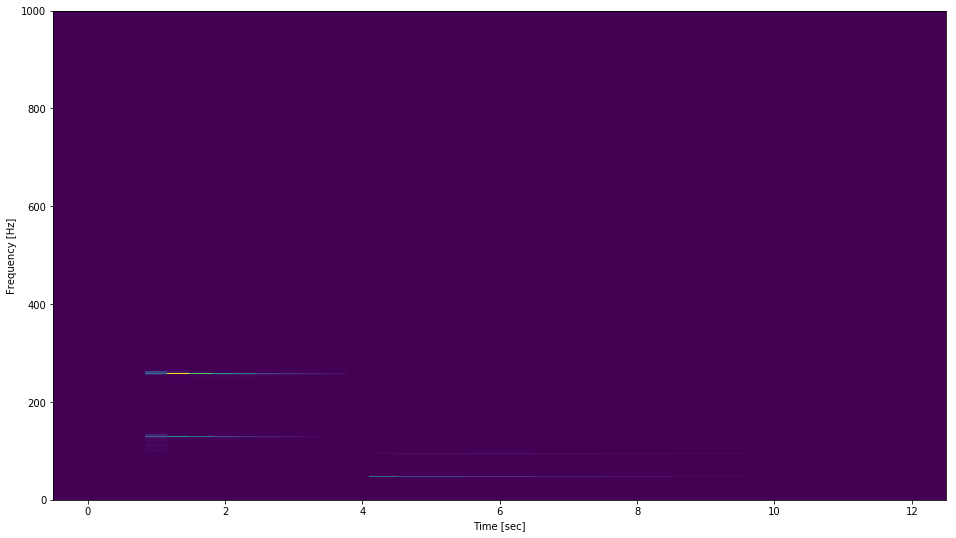

In [8]:
util.display_spec(time_guitar_note, freq_guitar_note, spectrogram_guitar_note, 1000)

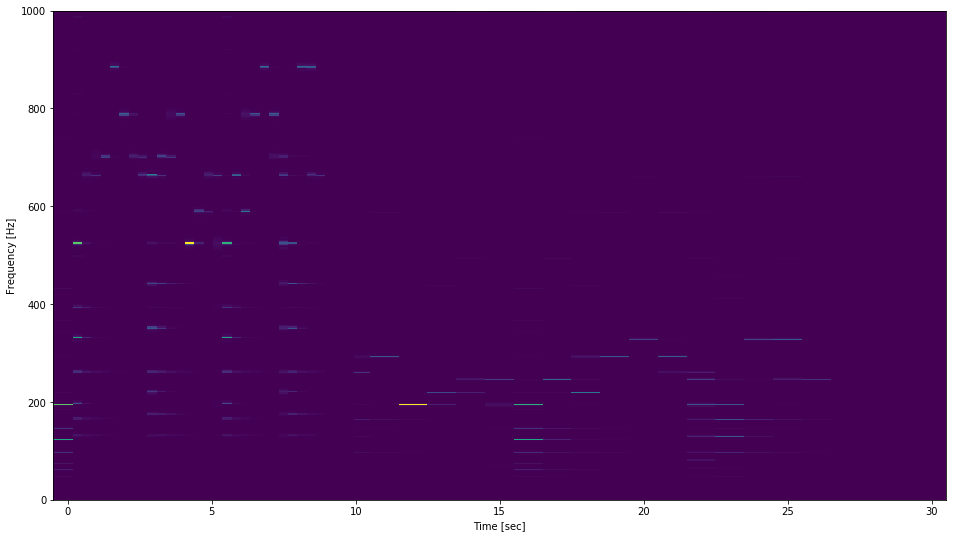

In [9]:
util.display_spec(time_piano, freq_piano, spectrogram_piano, 1000)

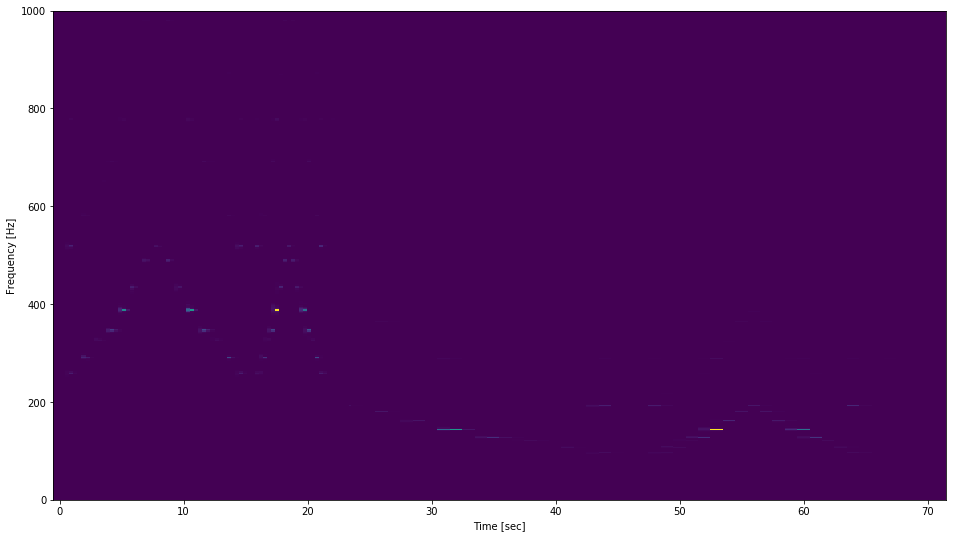

In [10]:
util.display_spec(time_piano_scale, freq_piano_scale, spectrogram_piano_scale, 1000)

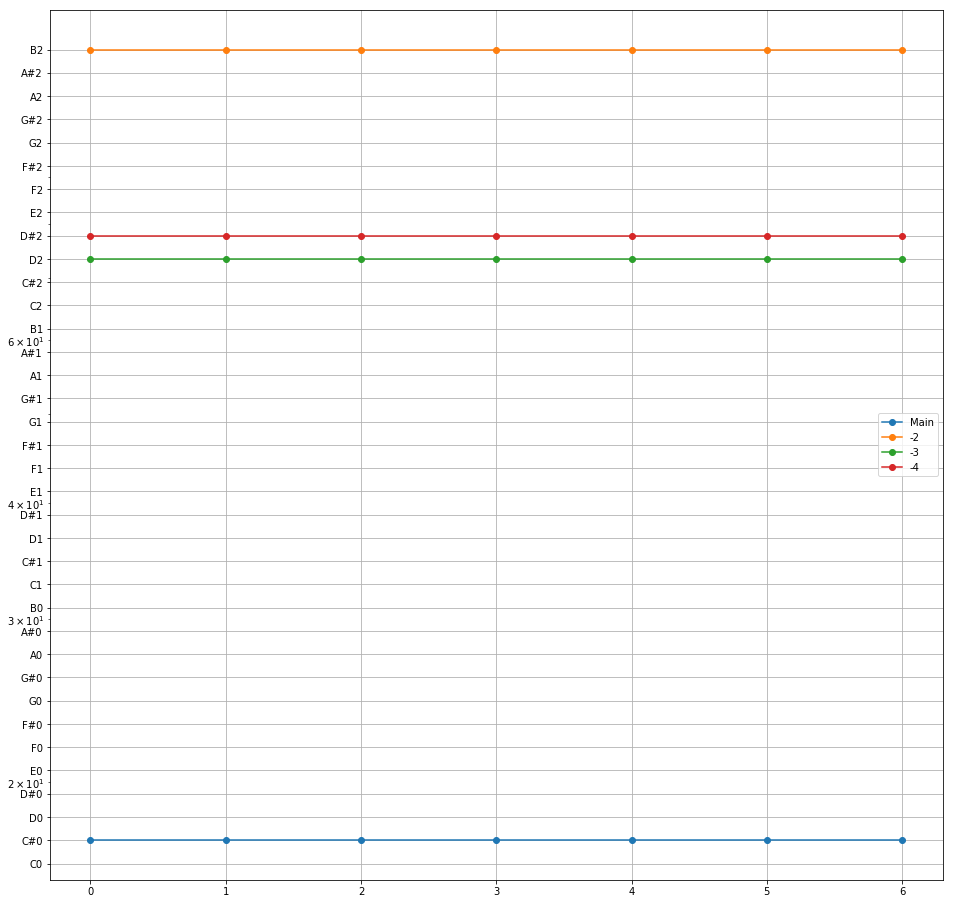

In [11]:
plt.figure(figsize=(16,16))
plt.plot(nf_piano_note[corr_piano_note.argmax(axis=0)][5:], 'o-', label='Main')
plt.plot(nf_piano_note[argsort_piano_note2[-2]][5:], 'o-', label='-2')
plt.plot(nf_piano_note[argsort_piano_note2[-3]][5:], 'o-', label='-3')
plt.plot(nf_piano_note[argsort_piano_note2[-4]][5:], 'o-', label='-4')

plt.legend()
plt.gca().set_yscale("log")
plt.yticks(util.frequencies('C0', 'C3'), util.note_names('C0', 'C3'))

# plt.xlim(1,11)

plt.gca().grid(True)
plt.gca().set_aspect('auto')

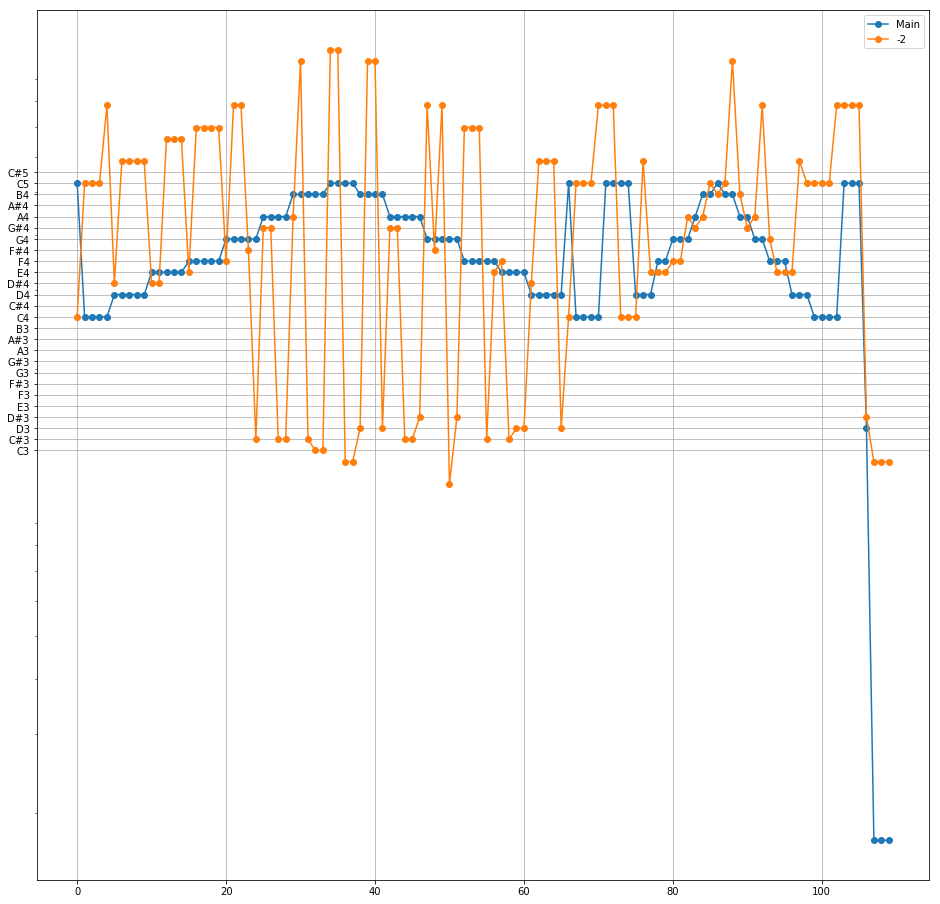

In [14]:
plt.figure(figsize=(16,16))
plt.plot(nf_piano_scale[corr_piano_scale.argmax(axis=0)][2:-2], 'o-', label='Main')
plt.plot(nf_piano_scale[argsort_piano_scale2[-2]][2:-2], 'o-', label='-2')
# plt.plot(nf_piano_scale[argsort_piano_scale2[-3]][2:-2], 'o-', label='-3')
# plt.plot(nf_piano_scale[argsort_piano_scale2[-4]][2:-2], 'o-', label='-4')

plt.legend()
plt.gca().set_yscale("log")
plt.yticks(util.frequencies('C3', 'D5'),
           util.note_names ('C3', 'D5'))
# plt.xlim(1,11)
plt.gca().grid(True)
plt.gca().set_aspect('auto')

Text(0,0.5,'Ratio (Inverted)')

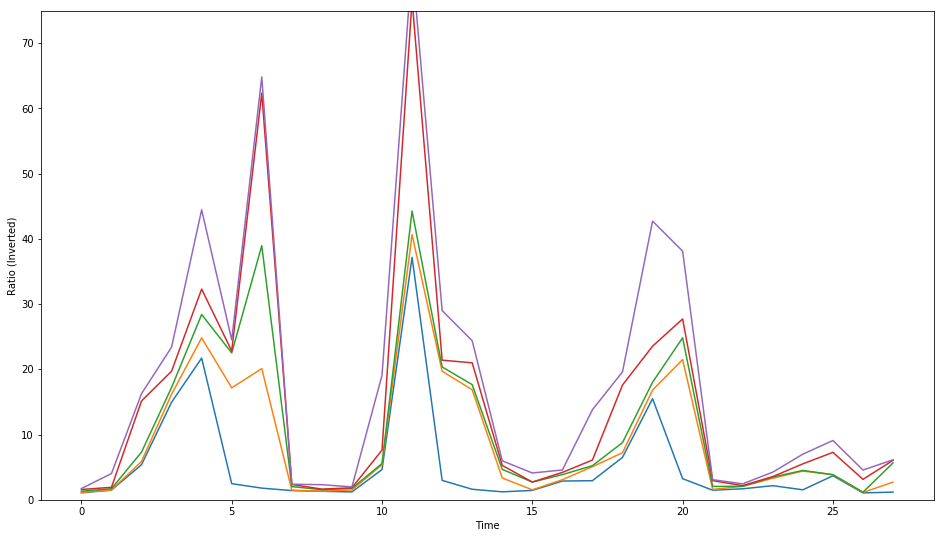

In [13]:
plt.figure(figsize=(16,9))
plt.plot(corr_piano.max(axis=0)[1:-2] / [corr_piano[x,i] for i,x in enumerate(argsort_piano2[-2][1:-2], 1)])
plt.plot(corr_piano.max(axis=0)[1:-2] / [corr_piano[x,i] for i,x in enumerate(argsort_piano2[-3][1:-2], 1)])
plt.plot(corr_piano.max(axis=0)[1:-2] / [corr_piano[x,i] for i,x in enumerate(argsort_piano2[-4][1:-2], 1)])
plt.plot(corr_piano.max(axis=0)[1:-2] / [corr_piano[x,i] for i,x in enumerate(argsort_piano2[-5][1:-2], 1)])
plt.plot(corr_piano.max(axis=0)[1:-2] / [corr_piano[x,i] for i,x in enumerate(argsort_piano2[-6][1:-2], 1)])


plt.ylim(0, 75)
plt.xlabel('Time')
plt.ylabel('Ratio (Inverted)')

Text(0,0.5,'Ratio (Inverted)')

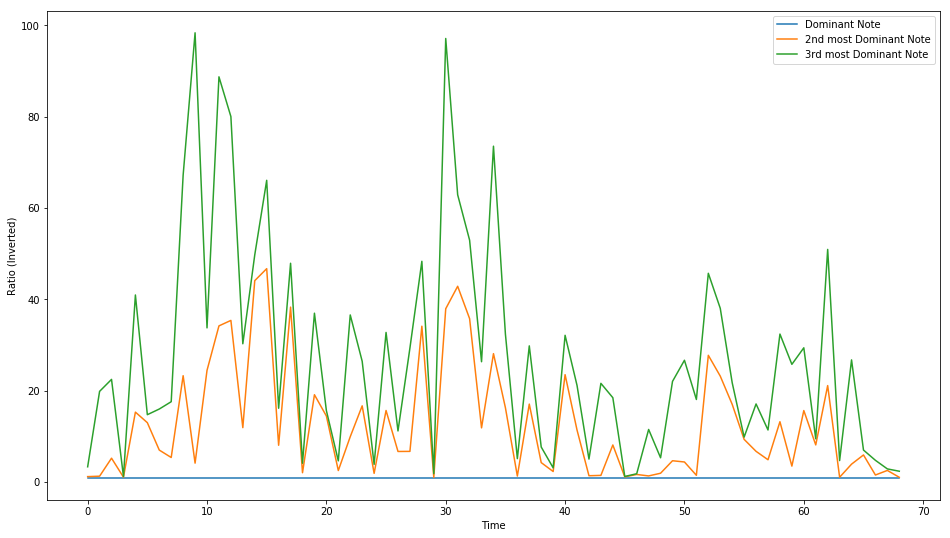

In [14]:
plt.figure(figsize=(16,9))
plt.plot(corr_piano_scale.max(axis=0)[1:-2] / [corr_piano_scale[x,i] for i,x in enumerate(argsort_piano_scale2[-1][1:-2], 1)], label="Dominant Note")
plt.plot(corr_piano_scale.max(axis=0)[1:-2] / [corr_piano_scale[x,i] for i,x in enumerate(argsort_piano_scale2[-2][1:-2], 1)], label="2nd most Dominant Note")
plt.plot(corr_piano_scale.max(axis=0)[1:-2] / [corr_piano_scale[x,i] for i,x in enumerate(argsort_piano_scale2[-3][1:-2], 1)], label="3rd most Dominant Note")
# plt.plot(corr_piano_scale.max(axis=0)[1:-2] / [corr_piano_scale[x,i] for i,x in enumerate(argsort_piano_scale2[-4][1:-2], 1)])
# plt.plot(corr_piano_scale.max(axis=0)[1:-2] / [corr_piano_scale[x,i] for i,x in enumerate(argsort_piano_scale2[-5][1:-2], 1)])
# plt.plot(corr_piano_scale.max(axis=0)[1:-2] / [corr_piano_scale[x,i] for i,x in enumerate(argsort_piano_scale2[-6][1:-2], 1)])

plt.legend()
# plt.ylim(0, 75)
plt.xlabel('Time')
plt.ylabel('Ratio (Inverted)')

/Users/Peeke/Honors/Examples/utilities.py:54: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(corr.max(axis=0)[1:] / [corr[x,i] for i,x in enumerate(argsort[-2][1:], 1)], label=lbl)


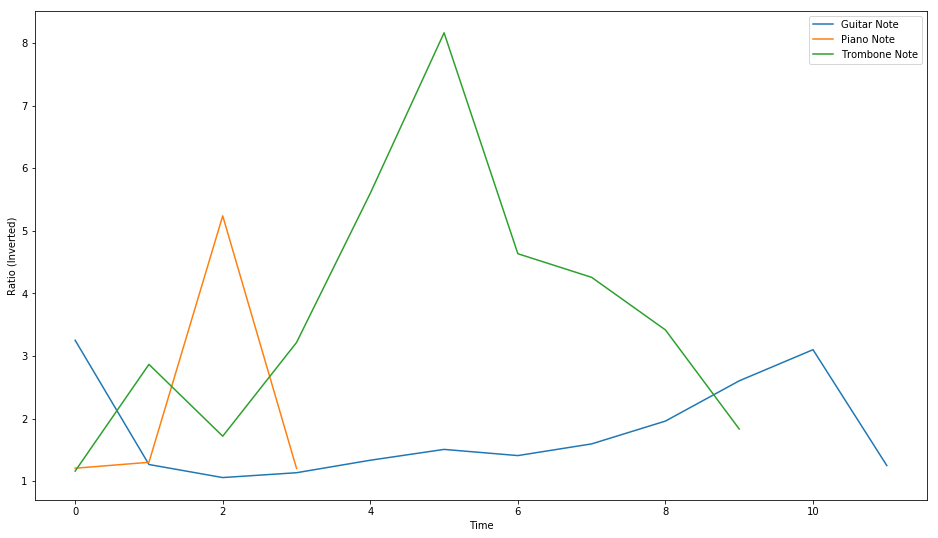

In [15]:
plt.figure(figsize=(16,9))

util.display_ratios(corr_guitar_note,   argsort_guitar_note2,   'Guitar Note')
util.display_ratios(corr_piano_note,    argsort_piano_note2,    'Piano Note')
util.display_ratios(corr_trombone_note, argsort_trombone_note2, 'Trombone Note')

/Users/Peeke/Honors/Examples/utilities.py:54: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(corr.max(axis=0)[1:] / [corr[x,i] for i,x in enumerate(argsort[-2][1:], 1)], label=lbl)


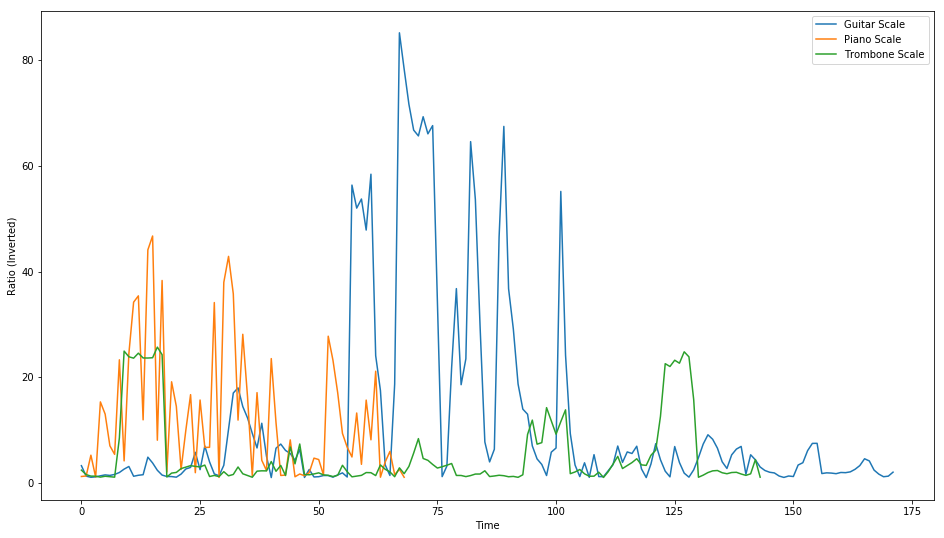

In [16]:
plt.figure(figsize=(16,9))

util.display_ratios(corr_guitar_scale, argsort_guitar_scale2, 'Guitar Scale')
util.display_ratios(corr_piano_scale, argsort_piano_scale2, 'Piano Scale')
util.display_ratios(corr_trombone_scale, argsort_trombone_scale2, 'Trombone Scale')

(array([13.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  124960.53248702,  1107159.08046443,  2089357.62844184,
         3071556.17641925,  4053754.72439666,  5035953.27237407,
         6018151.82035148,  7000350.36832889,  7982548.91630629,
         8964747.4642837 ,  9946946.01226111, 10929144.56023852,
        11911343.10821593, 12893541.65619334, 13875740.20417075,
        14857938.75214816, 15840137.30012557, 16822335.84810298,
        17804534.39608039, 18786732.9440578 , 19768931.4920352 ,
        20751130.04001261, 21733328.58799002, 22715527.13596743,
        23697725.68394484, 24679924.23192225]),
 <a list of 25 Patch objects>)

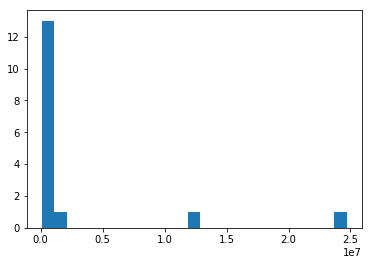

In [17]:
plt.hist(spectrogram_guitar_note[:,3][spectrogram_guitar_note[:,3]>1e5], 25)

(array([2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 123680.42974304,  440801.56676581,  757922.70378857,
        1075043.84081134, 1392164.97783411, 1709286.11485687,
        2026407.25187964, 2343528.38890241, 2660649.52592517,
        2977770.66294794, 3294891.79997071, 3612012.93699347,
        3929134.07401624, 4246255.21103901, 4563376.34806177,
        4880497.48508454, 5197618.62210731, 5514739.75913008,
        5831860.89615284, 6148982.03317561, 6466103.17019838,
        6783224.30722114, 7100345.44424391, 7417466.58126668,
        7734587.71828944, 8051708.85531221]),
 <a list of 25 Patch objects>)

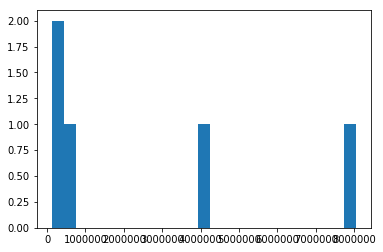

In [18]:
plt.hist(spectrogram_guitar_scale[:,3][spectrogram_guitar_scale[:,3]>1e5], 25)